In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import loadtxt
from xgboost import  XGBClassifier
from xgboost import plot_importance
import xgboost
from sklearn import metrics
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':    # 맥
    rc( 'font', family='AppleGothic' )
elif platform.system() == 'Windows': # 윈도우
    fontPath = 'c:/Windows/Fonts/malgun.ttf'
    fontName = font_manager.FontProperties( fname=fontPath ).get_name()
    rc( 'font', family=fontName )
else:
    print('알수없는 시스템. 미적용')
    
pd.set_option('display.expand_frame_repr', False)
import warnings
warnings.filterwarnings(action='ignore')

# preproccessing


In [37]:
non_out_kospi_200_items = pd.read_excel('./non_out_data2.xlsx')

In [35]:
dataset = pd.read_excel('./testdata.xlsx')

In [5]:
non_out_kospi_200_items = non_out_kospi_200_items[['종가 (5일 평균)(원)', '변동성 (5일)', '순매수수량(기관/외국인계)(20일합산)(주)',
       '순매수수량(외국인계)(20일합산)(주)', 'PER(IFRS-연결)', '순매수수량(개인)(20일합산)(주)',
       '종가 (60일 평균)(원)', '거래량 (20일 평균)(주)', '순매수수량(외국인계)(60일합산)(주)',
       '순매수수량(기관/외국인계)(60일합산)(주)', '순매수수량(외국인계)(주)', '순매수수량(기관계)(주)',
       '순매수수량(기관계)(60일합산)(주)', '순매수수량(개인)(주)', '외국인보유비중(티커)(%)',
       'PSR(IFRS-연결)', '종가 (120일 평균)(원)', '종가 (20일 평균)(원)',
       '순매수수량(개인)(60일합산)(주)', '거래량 (60일 평균)(주)', 'PCR(IFRS-연결)',
       '순매수수량(기관계)(20일합산)(주)', '수익률 (1주)(%)', 'PBR(IFRS-연결)', '거래량 (5일 평균)(주)',
       '순매수수량(기관/외국인계)(주)','종가 (5일 평균)(원)변화율',
       '변동성 (5일)변화율', '순매수수량(외국인계)(20일합산)(주)변화율', 'PER(IFRS-연결)변화율',
       '순매수수량(개인)(20일합산)(주)변화율', '종가 (60일 평균)(원)변화율', '거래량 (20일 평균)(주)변화율',
       '순매수수량(외국인계)(60일합산)(주)변화율', '순매수수량(기관/외국인계)(60일합산)(주)변화율',
       '순매수수량(외국인계)(주)변화율', '순매수수량(기관계)(주)변화율', '순매수수량(기관계)(60일합산)(주)변화율',
       '순매수수량(개인)(주)변화율', '외국인보유비중(티커)(%)변화율', 'PSR(IFRS-연결)변화율',
       '종가 (120일 평균)(원)변화율', '종가 (20일 평균)(원)변화율', '순매수수량(개인)(60일합산)(주)변화율',
       '거래량 (60일 평균)(주)변화율', 'PCR(IFRS-연결)변화율', '순매수수량(기관/외국인계)(20일합산)(주)변화율',
       '순매수수량(기관계)(20일합산)(주)변화율', '수익률 (1주)(%)변화율', 'PBR(IFRS-연결)변화율',
       '거래량 (5일 평균)(주)변화율', '순매수수량(기관/외국인계)(주)변화율', '수익률(%)(2)','Name']]

In [13]:
dataset = dataset[['종가 (5일 평균)(원)', '변동성 (5일)', '순매수수량(기관/외국인계)(20일합산)(주)',
       '순매수수량(외국인계)(20일합산)(주)', 'PER(IFRS-연결)', '순매수수량(개인)(20일합산)(주)',
       '종가 (60일 평균)(원)', '거래량 (20일 평균)(주)', '순매수수량(외국인계)(60일합산)(주)',
       '순매수수량(기관/외국인계)(60일합산)(주)', '순매수수량(외국인계)(주)', '순매수수량(기관계)(주)',
       '순매수수량(기관계)(60일합산)(주)', '순매수수량(개인)(주)', '외국인보유비중(티커)(%)',
       'PSR(IFRS-연결)', '종가 (120일 평균)(원)', '종가 (20일 평균)(원)',
       '순매수수량(개인)(60일합산)(주)', '거래량 (60일 평균)(주)', 'PCR(IFRS-연결)',
       '순매수수량(기관계)(20일합산)(주)', '수익률 (1주)(%)', 'PBR(IFRS-연결)', '거래량 (5일 평균)(주)',
       '순매수수량(기관/외국인계)(주)','종가 (5일 평균)(원)변화율',
       '변동성 (5일)변화율', '순매수수량(외국인계)(20일합산)(주)변화율', 'PER(IFRS-연결)변화율',
       '순매수수량(개인)(20일합산)(주)변화율', '종가 (60일 평균)(원)변화율', '거래량 (20일 평균)(주)변화율',
       '순매수수량(외국인계)(60일합산)(주)변화율', '순매수수량(기관/외국인계)(60일합산)(주)변화율',
       '순매수수량(외국인계)(주)변화율', '순매수수량(기관계)(주)변화율', '순매수수량(기관계)(60일합산)(주)변화율',
       '순매수수량(개인)(주)변화율', '외국인보유비중(티커)(%)변화율', 'PSR(IFRS-연결)변화율',
       '종가 (120일 평균)(원)변화율', '종가 (20일 평균)(원)변화율', '순매수수량(개인)(60일합산)(주)변화율',
       '거래량 (60일 평균)(주)변화율', 'PCR(IFRS-연결)변화율', '순매수수량(기관/외국인계)(20일합산)(주)변화율',
       '순매수수량(기관계)(20일합산)(주)변화율', '수익률 (1주)(%)변화율', 'PBR(IFRS-연결)변화율',
       '거래량 (5일 평균)(주)변화율', '순매수수량(기관/외국인계)(주)변화율', '수익률(%)(2)','Name']]

In [6]:
dataset = pd.DataFrame()
for i in list(set(non_out_kospi_200_items.Name)):
    a = non_out_kospi_200_items[non_out_kospi_200_items.Name == i]
    dataset = dataset.append(a)

ls = []
for i in list(set(dataset.Name)):
    if len(dataset[dataset.Name == i]) <800:
        ls.append(i)
        
for i in ls:
    dataset = dataset[dataset.Name != i]
    
dataset = dataset[dataset.Name == '코웨이']

In [7]:
def presnet_to_past(data,col):
    sets = pd.DataFrame()
    for i in list(set(data.Name)):
        sub = data[data.Name==i][col]
        present0 = sub[2:]
        pre0 = sub[:-2]
        present0.index = pre0.index
        c = present0 > pre0
        aa = pd.concat([pd.DataFrame([[0],[0]]), c])
        aa['Name']= i
        aa.index = sub.index
        sets = sets.append(aa[2:])
    sets.columns = [col,'Name']
    return sets

In [8]:
def cate_2(data,col):
    sets = pd.DataFrame()
    for i in list(set(data.Name)):
        sub = data[data.Name==i][col]
        aa = pd.DataFrame(sub >0)
        aa['Name']= i
        sets = sets.append(aa[2:])
        sets[col] = sets[col].astype(np.int)
    return sets

In [14]:
subset = pd.DataFrame()

for i in ['종가 (5일 평균)(원)', '변동성 (5일)', '순매수수량(기관/외국인계)(20일합산)(주)',
       '순매수수량(외국인계)(20일합산)(주)', 'PER(IFRS-연결)', '순매수수량(개인)(20일합산)(주)',
       '종가 (60일 평균)(원)', '거래량 (20일 평균)(주)', '순매수수량(외국인계)(60일합산)(주)',
       '순매수수량(기관/외국인계)(60일합산)(주)', '순매수수량(외국인계)(주)', '순매수수량(기관계)(주)',
       '순매수수량(기관계)(60일합산)(주)', '순매수수량(개인)(주)', '외국인보유비중(티커)(%)',
       'PSR(IFRS-연결)', '종가 (120일 평균)(원)', '종가 (20일 평균)(원)',
       '순매수수량(개인)(60일합산)(주)', '거래량 (60일 평균)(주)', 'PCR(IFRS-연결)',
       '순매수수량(기관계)(20일합산)(주)', 'PBR(IFRS-연결)', '거래량 (5일 평균)(주)',
       '순매수수량(기관/외국인계)(주)','수익률 (1주)(%)']:
    subset = pd.concat([subset,presnet_to_past(dataset,i)],axis=1)

subset2 = pd.DataFrame()
for k in ['종가 (5일 평균)(원)변화율',
       '변동성 (5일)변화율', '순매수수량(외국인계)(20일합산)(주)변화율', 'PER(IFRS-연결)변화율',
       '순매수수량(개인)(20일합산)(주)변화율', '종가 (60일 평균)(원)변화율', '거래량 (20일 평균)(주)변화율',
       '순매수수량(외국인계)(60일합산)(주)변화율', '순매수수량(기관/외국인계)(60일합산)(주)변화율',
       '순매수수량(외국인계)(주)변화율', '순매수수량(기관계)(주)변화율', '순매수수량(기관계)(60일합산)(주)변화율',
       '순매수수량(개인)(주)변화율', '외국인보유비중(티커)(%)변화율', 'PSR(IFRS-연결)변화율',
       '종가 (120일 평균)(원)변화율', '종가 (20일 평균)(원)변화율', '순매수수량(개인)(60일합산)(주)변화율',
       '거래량 (60일 평균)(주)변화율', 'PCR(IFRS-연결)변화율', '순매수수량(기관/외국인계)(20일합산)(주)변화율',
       '순매수수량(기관계)(20일합산)(주)변화율', '수익률 (1주)(%)변화율', 'PBR(IFRS-연결)변화율',
       '거래량 (5일 평균)(주)변화율', '순매수수량(기관/외국인계)(주)변화율']:
    
    subset2 = pd.concat([subset2,cate_2(dataset,k)],axis=1)
    
dataset2 = pd.concat([subset2,subset],axis=1)

subset3 = dataset2[['순매수수량(외국인계)(20일합산)(주)', '외국인보유비중(티커)(%)', '외국인보유비중(티커)(%)변화율',
 '변동성 (5일)', '순매수수량(외국인계)(60일합산)(주)', 'PCR(IFRS-연결)변화율', 'PBR(IFRS-연결)', '순매수수량(기관/외국인계)(주)',
 'PER(IFRS-연결)변화율', '거래량 (5일 평균)(주)', '종가 (60일 평균)(원)변화율', '종가 (20일 평균)(원)변화율', 'PER(IFRS-연결)',
 '종가 (5일 평균)(원)변화율', '종가 (5일 평균)(원)', '거래량 (60일 평균)(주)변화율', '순매수수량(기관/외국인계)(20일합산)(주)변화율',
 'PCR(IFRS-연결)', '거래량 (20일 평균)(주)변화율', '순매수수량(기관계)(20일합산)(주)변화율', '종가 (120일 평균)(원)변화율',
 '순매수수량(기관계)(60일합산)(주)변화율', '순매수수량(개인)(주)', '순매수수량(외국인계)(60일합산)(주)변화율', '거래량 (60일 평균)(주)',
 '종가 (20일 평균)(원)', '수익률 (1주)(%)', '순매수수량(개인)(20일합산)(주)', '순매수수량(개인)(60일합산)(주)변화율',
 '순매수수량(개인)(60일합산)(주)', '순매수수량(기관계)(주)변화율', '순매수수량(기관계)(60일합산)(주)', '순매수수량(외국인계)(주)',
 'PSR(IFRS-연결)변화율', '거래량 (20일 평균)(주)', '순매수수량(외국인계)(주)변화율', '순매수수량(기관계)(20일합산)(주)',
'순매수수량(기관/외국인계)(60일합산)(주)변화율', '거래량 (5일 평균)(주)변화율', '변동성 (5일)변화율',
 'PSR(IFRS-연결)', '순매수수량(외국인계)(20일합산)(주)변화율', '순매수수량(기관/외국인계)(60일합산)(주)',
 '종가 (120일 평균)(원)', 'PBR(IFRS-연결)변화율', '순매수수량(기관/외국인계)(주)변화율', '순매수수량(기관/외국인계)(20일합산)(주)',
 '종가 (60일 평균)(원)', '순매수수량(개인)(20일합산)(주)변화율', '수익률 (1주)(%)변화율', '순매수수량(개인)(주)변화율',
 '순매수수량(기관계)(주)', 'Name']]

subset4 = subset3.iloc[:,:53]

sets = pd.DataFrame()
for i in list(set(subset4.Name)):
    aa = subset4[subset4.Name == i]
    bb = dataset[dataset.Name == i]
    aa['수익률(%)(2)'] = bb['수익률(%)(2)'][2:]
    sets = sets.append(aa)

In [15]:
sets.to_excel('./Final_testdataset.xlsx',encoding='utf-8')

In [42]:
dataset.index

DatetimeIndex(['2018-12-26', '2018-12-27', '2018-12-28', '2019-01-02',
               '2019-01-03', '2019-01-04', '2019-01-07', '2019-01-09',
               '2019-01-10', '2019-01-11', '2019-01-14', '2019-01-15',
               '2019-01-16', '2019-01-18', '2019-01-21', '2019-01-22',
               '2019-01-23', '2019-01-24', '2019-01-25', '2019-01-28',
               '2019-01-29'],
              dtype='datetime64[ns]', freq=None)

# Selection


In [2]:
final_dataset = pd.read_excel('./Final_dataset.xlsx')

In [3]:
final_dataset = final_dataset[final_dataset.Name == '코웨이']

*********************코웨이*********************


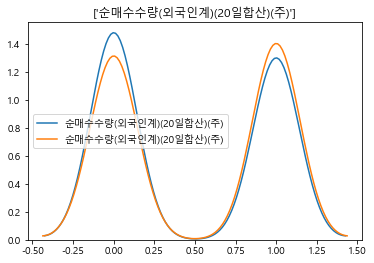

*********************코웨이*********************


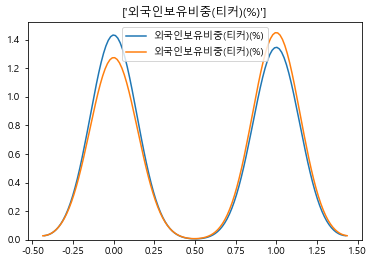

*********************코웨이*********************


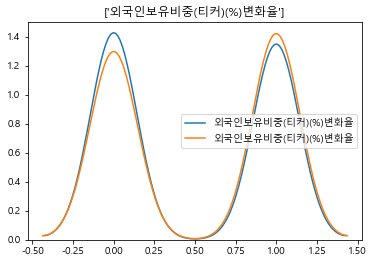

*********************코웨이*********************


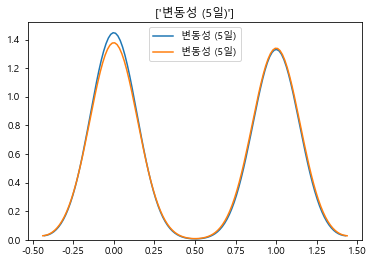

*********************코웨이*********************


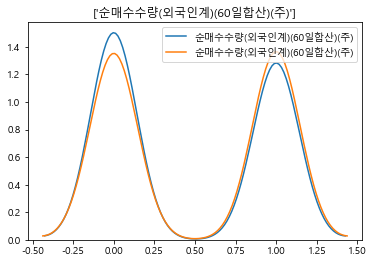

*********************코웨이*********************


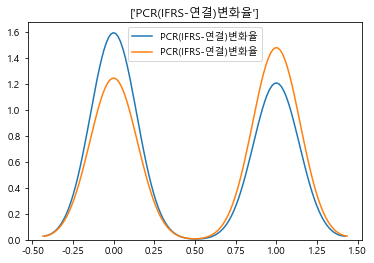

*********************코웨이*********************


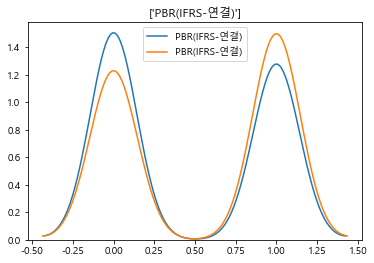

*********************코웨이*********************


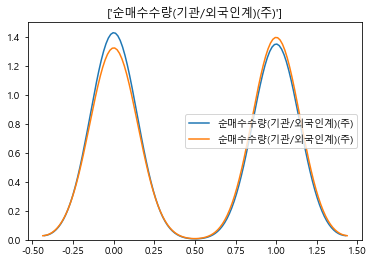

*********************코웨이*********************


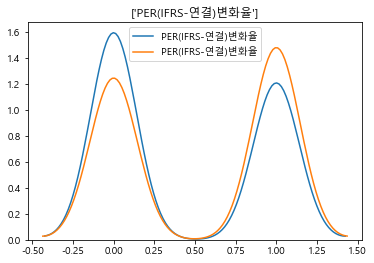

*********************코웨이*********************


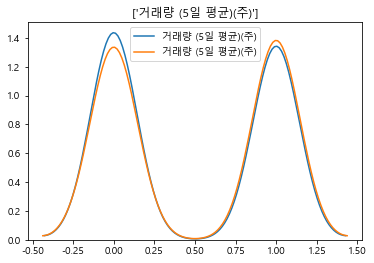

*********************코웨이*********************


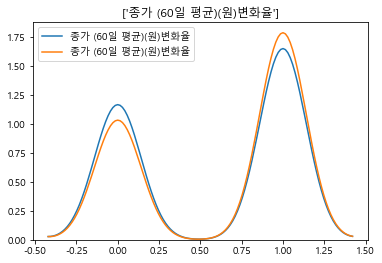

*********************코웨이*********************


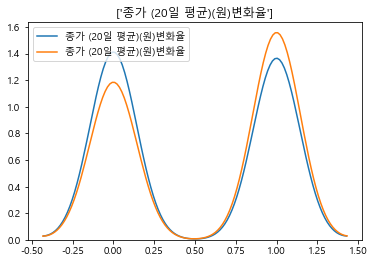

*********************코웨이*********************


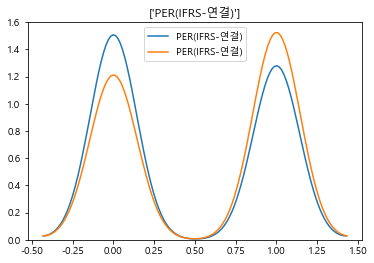

*********************코웨이*********************


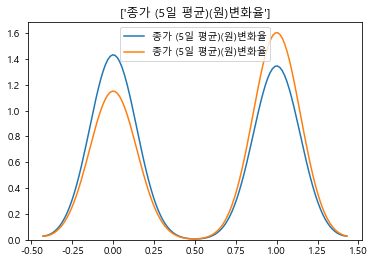

*********************코웨이*********************


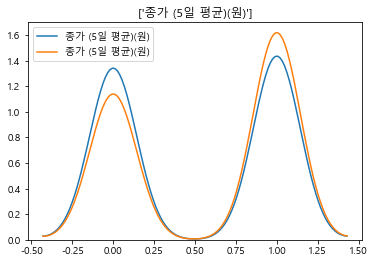

*********************코웨이*********************


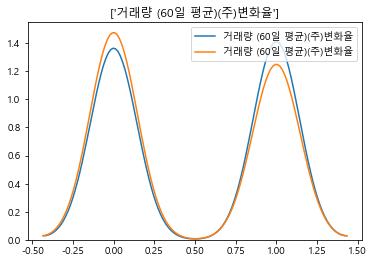

*********************코웨이*********************


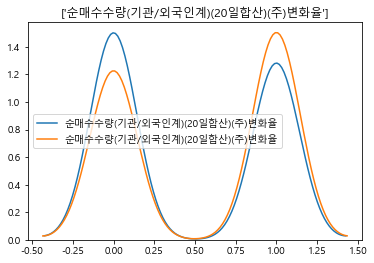

*********************코웨이*********************


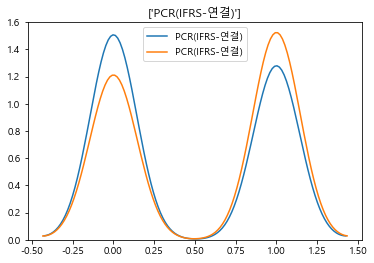

*********************코웨이*********************


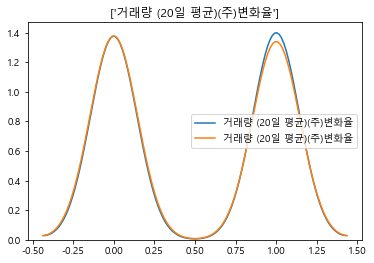

*********************코웨이*********************


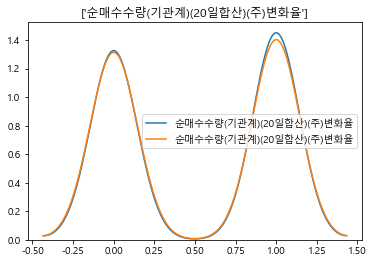

*********************코웨이*********************


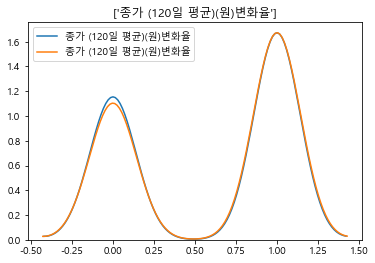

*********************코웨이*********************


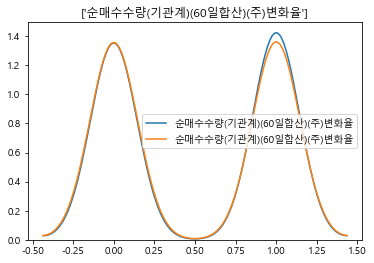

*********************코웨이*********************


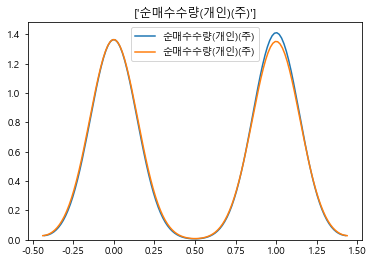

*********************코웨이*********************


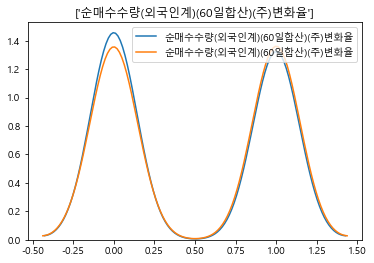

*********************코웨이*********************


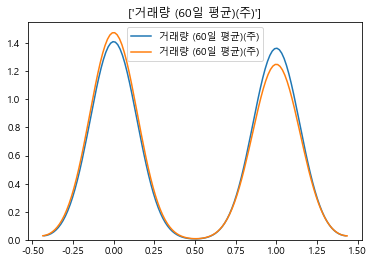

*********************코웨이*********************


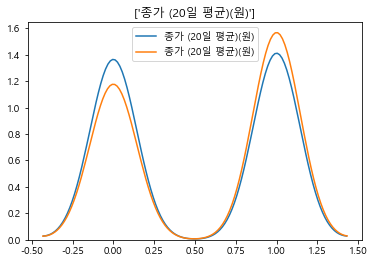

*********************코웨이*********************


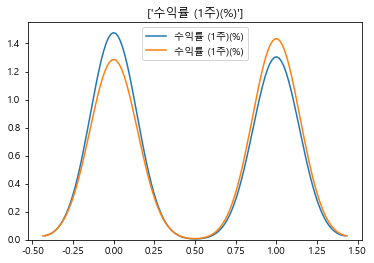

*********************코웨이*********************


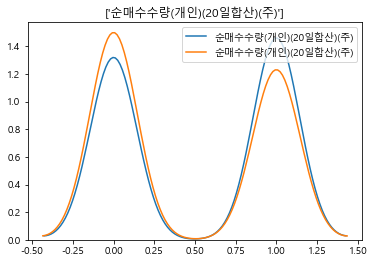

*********************코웨이*********************


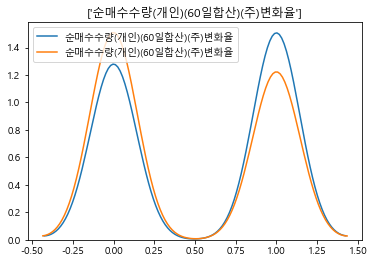

*********************코웨이*********************


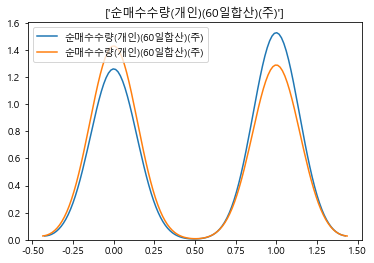

*********************코웨이*********************


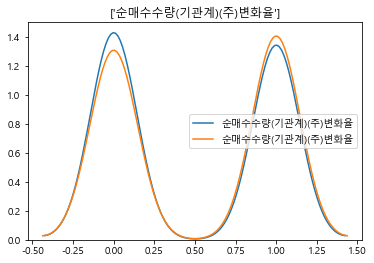

*********************코웨이*********************


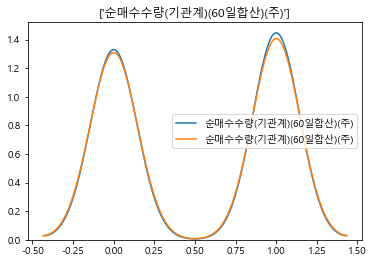

*********************코웨이*********************


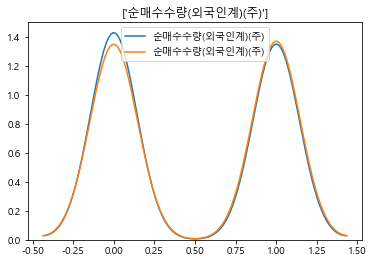

*********************코웨이*********************


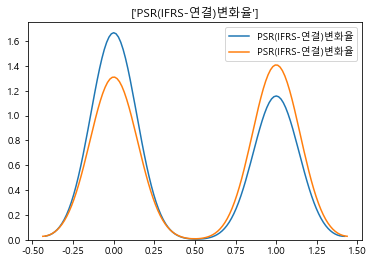

*********************코웨이*********************


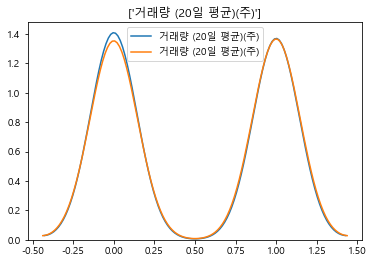

*********************코웨이*********************


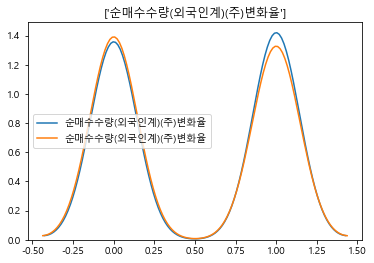

*********************코웨이*********************


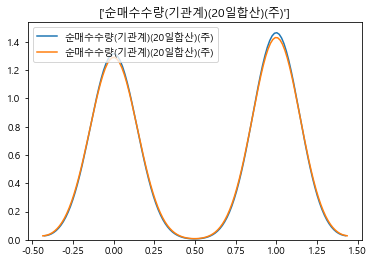

*********************코웨이*********************


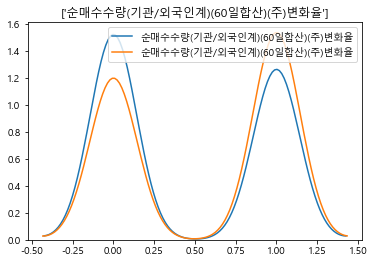

*********************코웨이*********************


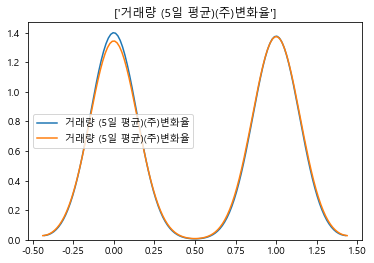

*********************코웨이*********************


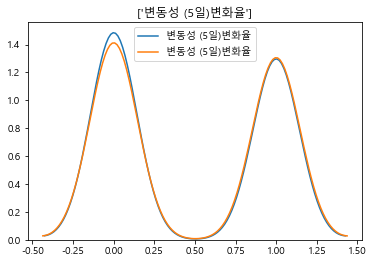

*********************코웨이*********************


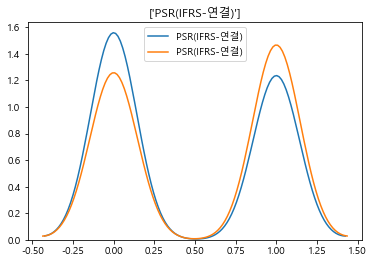

*********************코웨이*********************


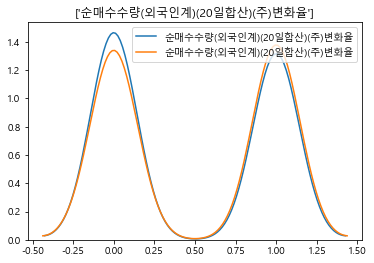

*********************코웨이*********************


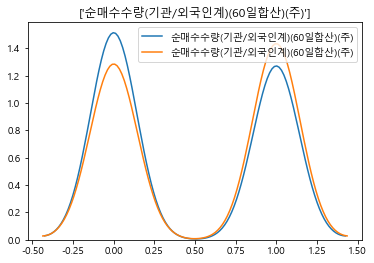

*********************코웨이*********************


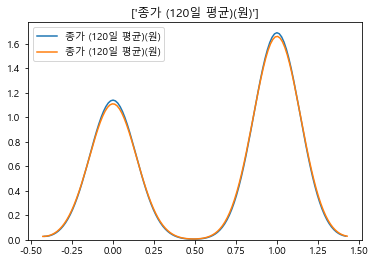

*********************코웨이*********************


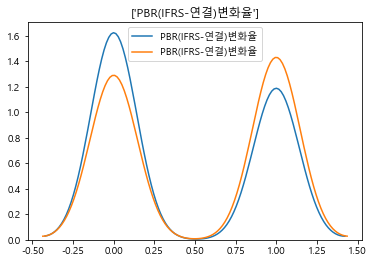

*********************코웨이*********************


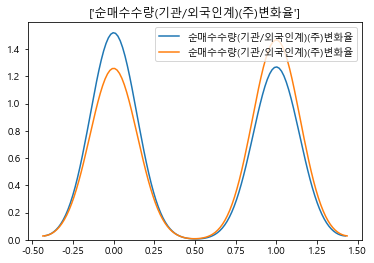

*********************코웨이*********************


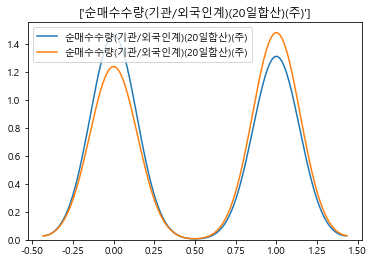

*********************코웨이*********************


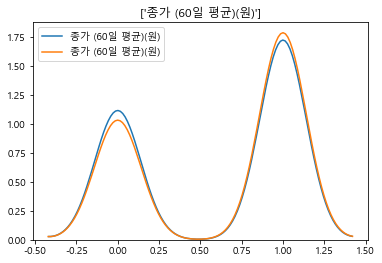

*********************코웨이*********************


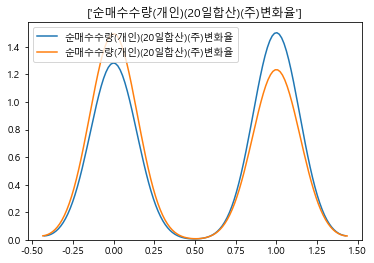

*********************코웨이*********************


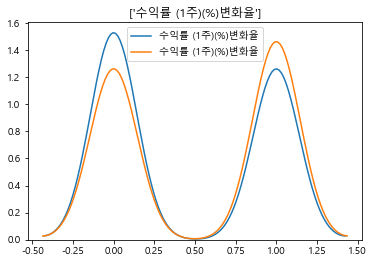

*********************코웨이*********************


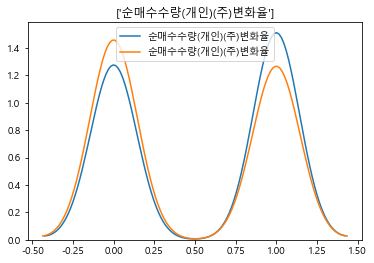

*********************코웨이*********************


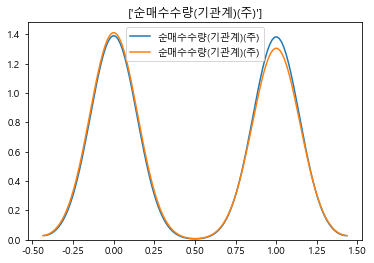

In [5]:
K='코웨이'
for i in ['순매수수량(외국인계)(20일합산)(주)','외국인보유비중(티커)(%)', '외국인보유비중(티커)(%)변화율',
 '변동성 (5일)', '순매수수량(외국인계)(60일합산)(주)', 'PCR(IFRS-연결)변화율', 'PBR(IFRS-연결)',
 '순매수수량(기관/외국인계)(주)', 'PER(IFRS-연결)변화율', '거래량 (5일 평균)(주)', '종가 (60일 평균)(원)변화율',
 '종가 (20일 평균)(원)변화율','PER(IFRS-연결)','종가 (5일 평균)(원)변화율','종가 (5일 평균)(원)',
 '거래량 (60일 평균)(주)변화율','순매수수량(기관/외국인계)(20일합산)(주)변화율','PCR(IFRS-연결)',
 '거래량 (20일 평균)(주)변화율','순매수수량(기관계)(20일합산)(주)변화율','종가 (120일 평균)(원)변화율',
 '순매수수량(기관계)(60일합산)(주)변화율', '순매수수량(개인)(주)', '순매수수량(외국인계)(60일합산)(주)변화율',
 '거래량 (60일 평균)(주)', '종가 (20일 평균)(원)', '수익률 (1주)(%)', '순매수수량(개인)(20일합산)(주)',
 '순매수수량(개인)(60일합산)(주)변화율', '순매수수량(개인)(60일합산)(주)', '순매수수량(기관계)(주)변화율',
 '순매수수량(기관계)(60일합산)(주)', '순매수수량(외국인계)(주)', 'PSR(IFRS-연결)변화율', '거래량 (20일 평균)(주)',
 '순매수수량(외국인계)(주)변화율', '순매수수량(기관계)(20일합산)(주)', '순매수수량(기관/외국인계)(60일합산)(주)변화율',
 '거래량 (5일 평균)(주)변화율', '변동성 (5일)변화율', 'PSR(IFRS-연결)', '순매수수량(외국인계)(20일합산)(주)변화율',
 '순매수수량(기관/외국인계)(60일합산)(주)', '종가 (120일 평균)(원)', 'PBR(IFRS-연결)변화율',
 '순매수수량(기관/외국인계)(주)변화율', '순매수수량(기관/외국인계)(20일합산)(주)', '종가 (60일 평균)(원)',
 '순매수수량(개인)(20일합산)(주)변화율', '수익률 (1주)(%)변화율', '순매수수량(개인)(주)변화율', '순매수수량(기관계)(주)']:
    sns.kdeplot(data=final_dataset[final_dataset['수익률(%)(2)'] == 1][i])
    sns.kdeplot(data=final_dataset[final_dataset['수익률(%)(2)'] == 0][i])
    plt.title([i])
    print('*********************{}*********************'.format(K))
    plt.show()

In [1]:
for com in list(set(sets.Name)):
    for i in ['순매수수량(외국인계)(20일합산)(주)','외국인보유비중(티커)(%)', '외국인보유비중(티커)(%)변화율',
 '변동성 (5일)', '순매수수량(외국인계)(60일합산)(주)', 'PCR(IFRS-연결)변화율', 'PBR(IFRS-연결)',
 '순매수수량(기관/외국인계)(주)', 'PER(IFRS-연결)변화율', '거래량 (5일 평균)(주)', '종가 (60일 평균)(원)변화율',
 '종가 (20일 평균)(원)변화율','PER(IFRS-연결)','종가 (5일 평균)(원)변화율','종가 (5일 평균)(원)',
 '거래량 (60일 평균)(주)변화율','순매수수량(기관/외국인계)(20일합산)(주)변화율','PCR(IFRS-연결)',
 '거래량 (20일 평균)(주)변화율','순매수수량(기관계)(20일합산)(주)변화율','종가 (120일 평균)(원)변화율',
 '순매수수량(기관계)(60일합산)(주)변화율', '순매수수량(개인)(주)', '순매수수량(외국인계)(60일합산)(주)변화율',
 '거래량 (60일 평균)(주)', '종가 (20일 평균)(원)', '수익률 (1주)(%)', '순매수수량(개인)(20일합산)(주)',
 '순매수수량(개인)(60일합산)(주)변화율', '순매수수량(개인)(60일합산)(주)', '순매수수량(기관계)(주)변화율',
 '순매수수량(기관계)(60일합산)(주)', '순매수수량(외국인계)(주)', 'PSR(IFRS-연결)변화율', '거래량 (20일 평균)(주)',
 '순매수수량(외국인계)(주)변화율', '순매수수량(기관계)(20일합산)(주)', '순매수수량(기관/외국인계)(60일합산)(주)변화율',
 '거래량 (5일 평균)(주)변화율', '변동성 (5일)변화율', 'PSR(IFRS-연결)', '순매수수량(외국인계)(20일합산)(주)변화율',
 '순매수수량(기관/외국인계)(60일합산)(주)', '종가 (120일 평균)(원)', 'PBR(IFRS-연결)변화율',
 '순매수수량(기관/외국인계)(주)변화율', '순매수수량(기관/외국인계)(20일합산)(주)', '종가 (60일 평균)(원)',
 '순매수수량(개인)(20일합산)(주)변화율', '수익률 (1주)(%)변화율', '순매수수량(개인)(주)변화율', '순매수수량(기관계)(주)']:
        sub = final_dataset[final_dataset.Name == com]
        a = (len(sub[sub['수익률(%)(2)'] == 1]) - sub[sub['수익률(%)(2)'] == 1][i].sum())/len(sub[sub['수익률(%)(2)'] == 1][i])- (len(sub[sub['수익률(%)(2)'] == 0]) - sub[sub['수익률(%)(2)'] == 0][i].sum())/len(sub[sub['수익률(%)(2)'] == 0][i])
        if abs(a) > 0.1:
            print(com,a)

NameError: name 'sets' is not defined

In [2]:
for com in list(set(sets.Name)):
    for i in ['순매수수량(외국인계)(20일합산)(주)','외국인보유비중(티커)(%)', '외국인보유비중(티커)(%)변화율',
 '변동성 (5일)', '순매수수량(외국인계)(60일합산)(주)', 'PCR(IFRS-연결)변화율', 'PBR(IFRS-연결)',
 '순매수수량(기관/외국인계)(주)', 'PER(IFRS-연결)변화율', '거래량 (5일 평균)(주)', '종가 (60일 평균)(원)변화율',
 '종가 (20일 평균)(원)변화율','PER(IFRS-연결)','종가 (5일 평균)(원)변화율','종가 (5일 평균)(원)',
 '거래량 (60일 평균)(주)변화율','순매수수량(기관/외국인계)(20일합산)(주)변화율','PCR(IFRS-연결)',
 '거래량 (20일 평균)(주)변화율','순매수수량(기관계)(20일합산)(주)변화율','종가 (120일 평균)(원)변화율',
 '순매수수량(기관계)(60일합산)(주)변화율', '순매수수량(개인)(주)', '순매수수량(외국인계)(60일합산)(주)변화율',
 '거래량 (60일 평균)(주)', '종가 (20일 평균)(원)', '수익률 (1주)(%)', '순매수수량(개인)(20일합산)(주)',
 '순매수수량(개인)(60일합산)(주)변화율', '순매수수량(개인)(60일합산)(주)', '순매수수량(기관계)(주)변화율',
 '순매수수량(기관계)(60일합산)(주)', '순매수수량(외국인계)(주)', 'PSR(IFRS-연결)변화율', '거래량 (20일 평균)(주)',
 '순매수수량(외국인계)(주)변화율', '순매수수량(기관계)(20일합산)(주)', '순매수수량(기관/외국인계)(60일합산)(주)변화율',
 '거래량 (5일 평균)(주)변화율', '변동성 (5일)변화율', 'PSR(IFRS-연결)', '순매수수량(외국인계)(20일합산)(주)변화율',
 '순매수수량(기관/외국인계)(60일합산)(주)', '종가 (120일 평균)(원)', 'PBR(IFRS-연결)변화율',
 '순매수수량(기관/외국인계)(주)변화율', '순매수수량(기관/외국인계)(20일합산)(주)', '종가 (60일 평균)(원)',
 '순매수수량(개인)(20일합산)(주)변화율', '수익률 (1주)(%)변화율', '순매수수량(개인)(주)변화율', '순매수수량(기관계)(주)']:
        sub = final_dataset[final_dataset.Name == com]
        a = (sub[sub['수익률(%)(2)'] == 1][i].sum()/len(sub[sub['수익률(%)(2)'] == 1][i])) - (sub[sub['수익률(%)(2)'] == 0][i].sum()/len(sub[sub['수익률(%)(2)'] == 0][i]))
        if abs(a) > 0.1:
            print(com,a)

NameError: name 'sets' is not defined

In [16]:
def data_sp(data):
    com_name_set = list(set(data.Name))
    
    train_set = pd.DataFrame()
    test_set = pd.DataFrame()
    
    for i in range(len(com_name_set)):
        sub_set = data[ data.Name == com_name_set[i]]
        train_set = train_set.append(sub_set[:-60])
        test_set = test_set.append(sub_set[-60:])
    return train_set , test_set

In [17]:
train, test = data_sp(final_dataset)

In [14]:
print(train.shape,test.shape)

(1229, 54) (120, 54)


In [49]:
test

,순매수수량(외국인계)(20일합산)(주),외국인보유비중(티커)(%),외국인보유비중(티커)(%)변화율,변동성 (5일),순매수수량(외국인계)(60일합산)(주),PCR(IFRS-연결)변화율,PBR(IFRS-연결),순매수수량(기관/외국인계)(주),PER(IFRS-연결)변화율,거래량 (5일 평균)(주),...,PBR(IFRS-연결)변화율,순매수수량(기관/외국인계)(주)변화율,순매수수량(기관/외국인계)(20일합산)(주),종가 (60일 평균)(원),순매수수량(개인)(20일합산)(주)변화율,수익률 (1주)(%)변화율,순매수수량(개인)(주)변화율,순매수수량(기관계)(주),Name,수익률(%)(2)
2018-10-01,0,0,1,0,1,0,1,1,0,0,...,0,1,1,1,0,0,1,0,코웨이,0
2018-10-02,0,1,1,0,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,코웨이,0
2018-10-04,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,1,1,코웨이,1
2018-10-05,0,0,0,1,0,1,0,1,1,0,...,1,1,0,0,0,1,0,1,코웨이,0
2018-10-08,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,1,1,1,0,코웨이,0
2018-10-10,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,코웨이,0
2018-10-11,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,1,1,코웨이,1
2018-10-12,0,0,0,1,0,1,0,0,1,1,...,0,1,0,0,1,0,0,0,코웨이,0
2018-10-15,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,1,0,코웨이,1
2018-10-16,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,코웨이,1


In [227]:
colsss = ['PBR(IFRS-연결)', 'PBR(IFRS-연결)변화율', 'PCR(IFRS-연결)', 'PCR(IFRS-연결)변화율',
         'PER(IFRS-연결)', 'PER(IFRS-연결)변화율', 'PSR(IFRS-연결)', 'PSR(IFRS-연결)변화율',
         '거래량 (20일 평균)(주)', '거래량 (20일 평균)(주)변화율', '거래량 (5일 평균)(주)', '거래량 (5일 평균)(주)변화율',
         '거래량 (60일 평균)(주)', '거래량 (60일 평균)(주)변화율', '변동성 (5일)', '변동성 (5일)변화율',
         '수익률 (1주)(%)', '수익률 (1주)(%)변화율', '순매수수량(개인)(20일합산)(주)', '순매수수량(개인)(20일합산)(주)변화율',
         '순매수수량(개인)(60일합산)(주)', '순매수수량(개인)(60일합산)(주)변화율', '순매수수량(개인)(주)', '순매수수량(개인)(주)변화율',
         '순매수수량(기관/외국인계)(20일합산)(주)', '순매수수량(기관/외국인계)(20일합산)(주)변화율',
         '순매수수량(기관/외국인계)(60일합산)(주)', '순매수수량(기관/외국인계)(60일합산)(주)변화율',
         '순매수수량(기관/외국인계)(주)', '순매수수량(기관/외국인계)(주)변화율',
         '순매수수량(기관계)(20일합산)(주)', '순매수수량(기관계)(20일합산)(주)변화율',
         '순매수수량(기관계)(60일합산)(주)', '순매수수량(기관계)(60일합산)(주)변화율',
         '순매수수량(기관계)(주)', '순매수수량(기관계)(주)변화율',
         '순매수수량(외국인계)(20일합산)(주)', '순매수수량(외국인계)(20일합산)(주)변화율',
         '순매수수량(외국인계)(60일합산)(주)', '순매수수량(외국인계)(60일합산)(주)변화율',
         '순매수수량(외국인계)(주)', '순매수수량(외국인계)(주)변화율',
         '외국인보유비중(티커)(%)', '외국인보유비중(티커)(%)변화율',
         '종가 (120일 평균)(원)', '종가 (120일 평균)(원)변화율', '종가 (20일 평균)(원)', '종가 (20일 평균)(원)변화율',
         '종가 (5일 평균)(원)', '종가 (5일 평균)(원)변화율', '종가 (60일 평균)(원)', '종가 (60일 평균)(원)변화율']

### 2진화한 데이터셋 분석
## xgboost

In [36]:
## 60일 결과

colsss = ['PBR(IFRS-연결)', 'PBR(IFRS-연결)변화율', 'PCR(IFRS-연결)', 'PCR(IFRS-연결)변화율',
         'PER(IFRS-연결)', 'PER(IFRS-연결)변화율', 'PSR(IFRS-연결)', 'PSR(IFRS-연결)변화율',
         '거래량 (20일 평균)(주)', '거래량 (20일 평균)(주)변화율', '거래량 (5일 평균)(주)', '거래량 (5일 평균)(주)변화율',
         '거래량 (60일 평균)(주)', '거래량 (60일 평균)(주)변화율', '변동성 (5일)', '변동성 (5일)변화율',
         '수익률 (1주)(%)', '수익률 (1주)(%)변화율', '순매수수량(개인)(20일합산)(주)', '순매수수량(개인)(20일합산)(주)변화율',
         '순매수수량(개인)(60일합산)(주)', '순매수수량(개인)(60일합산)(주)변화율', '순매수수량(개인)(주)', '순매수수량(개인)(주)변화율',
         '순매수수량(기관/외국인계)(20일합산)(주)', '순매수수량(기관/외국인계)(20일합산)(주)변화율',
         '순매수수량(기관/외국인계)(60일합산)(주)', '순매수수량(기관/외국인계)(60일합산)(주)변화율',
         '순매수수량(기관/외국인계)(주)', '순매수수량(기관/외국인계)(주)변화율',
         '순매수수량(기관계)(20일합산)(주)', '순매수수량(기관계)(20일합산)(주)변화율',
         '순매수수량(기관계)(60일합산)(주)', '순매수수량(기관계)(60일합산)(주)변화율',
         '순매수수량(기관계)(주)', '순매수수량(기관계)(주)변화율',
         '순매수수량(외국인계)(20일합산)(주)', '순매수수량(외국인계)(20일합산)(주)변화율',
         '순매수수량(외국인계)(60일합산)(주)', '순매수수량(외국인계)(60일합산)(주)변화율',
         '순매수수량(외국인계)(주)', '순매수수량(외국인계)(주)변화율',
         '외국인보유비중(티커)(%)', '외국인보유비중(티커)(%)변화율',
         '종가 (120일 평균)(원)', '종가 (120일 평균)(원)변화율', '종가 (20일 평균)(원)', '종가 (20일 평균)(원)변화율',
         '종가 (5일 평균)(원)', '종가 (5일 평균)(원)변화율', '종가 (60일 평균)(원)', '종가 (60일 평균)(원)변화율']

accsets = pd.DataFrame([list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),
                       list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5)),list(np.zeros(5))],
                       columns=['train_val_pro','test_pro','pre_pro','features','lenth_of_feature'])

    ## train test를 X,Y 나누기 42/
for i in range(50):
    X_train = train[colsss]
    X_test = test[colsss]

    Y_train = train['수익률(%)(2)']
    Y_test = test['수익률(%)(2)']

    model = RandomForestClassifier(n_estimators=500)
    model.fit(X_train[colsss] ,Y_train)
    a = model.predict(X_train[colsss])
    b = model.predict(X_test[colsss])
    t = metrics.confusion_matrix(Y_test,b)
    
    accsets['train_val_pro'][i] = metrics.accuracy_score(a,Y_train)
    accsets['test_pro'][i] = metrics.accuracy_score(b,Y_test)
    accsets['pre_pro'][i] = t[1,1]/t[:,1].sum()
    accsets['features'][i] = colsss
    accsets['lenth_of_feature'][i] = int(len(colsss))
    a = pd.DataFrame(colsss)[pd.DataFrame(model.feature_importances_ == min(model.feature_importances_)) == False].iloc[:,0]
    a.dropna(inplace=True, axis=0)
    colsss = list(a)
accsets


,train_val_pro,test_pro,pre_pro,features,lenth_of_feature
0,0.999224,0.616667,0.583333,"[PBR(IFRS-연결), PBR(IFRS-연결)변화율, PCR(IFRS-연결), ...",52.0
1,0.999224,0.566667,0.555556,"[PBR(IFRS-연결), PBR(IFRS-연결)변화율, PCR(IFRS-연결), ...",51.0
2,0.999224,0.600000,0.574468,"[PBR(IFRS-연결)변화율, PCR(IFRS-연결), PER(IFRS-연결), ...",50.0
3,0.999224,0.633333,0.591837,"[PCR(IFRS-연결), PER(IFRS-연결), PER(IFRS-연결)변화율, ...",49.0
4,0.999224,0.633333,0.591837,"[PER(IFRS-연결), PER(IFRS-연결)변화율, PSR(IFRS-연결), ...",48.0
5,0.999224,0.633333,0.595745,"[PER(IFRS-연결), PER(IFRS-연결)변화율, PSR(IFRS-연결), ...",47.0
6,0.999224,0.566667,0.555556,"[PER(IFRS-연결), PER(IFRS-연결)변화율, 거래량 (20일 평균)(주...",46.0
7,0.999224,0.566667,0.553191,"[PER(IFRS-연결), PER(IFRS-연결)변화율, 거래량 (20일 평균)(주...",45.0
8,0.999224,0.616667,0.583333,"[PER(IFRS-연결), PER(IFRS-연결)변화율, 거래량 (20일 평균)(주...",44.0
9,0.999224,0.583333,0.560000,"[PER(IFRS-연결), PER(IFRS-연결)변화율, 거래량 (20일 평균)(주...",43.0


In [10]:
accsets.iloc[26,3]

['PCR(IFRS-연결)',
 '거래량 (5일 평균)(주)변화율',
 '거래량 (60일 평균)(주)변화율',
 '변동성 (5일)변화율',
 '수익률 (1주)(%)',
 '순매수수량(개인)(20일합산)(주)',
 '순매수수량(개인)(주)',
 '순매수수량(기관/외국인계)(60일합산)(주)',
 '순매수수량(기관/외국인계)(주)변화율',
 '순매수수량(기관계)(20일합산)(주)',
 '순매수수량(기관계)(주)',
 '순매수수량(기관계)(주)변화율',
 '순매수수량(외국인계)(60일합산)(주)',
 '순매수수량(외국인계)(주)',
 '순매수수량(외국인계)(주)변화율',
 '종가 (120일 평균)(원)변화율',
 '종가 (20일 평균)(원)변화율']

In [251]:
co = ['PCR(IFRS-연결)',
 '거래량 (5일 평균)(주)변화율',
 '거래량 (60일 평균)(주)변화율',
 '변동성 (5일)변화율',
 '수익률 (1주)(%)',
 '순매수수량(개인)(20일합산)(주)',
 '순매수수량(개인)(주)',
 '순매수수량(기관/외국인계)(60일합산)(주)',
 '순매수수량(기관/외국인계)(주)변화율',
 '순매수수량(기관계)(20일합산)(주)',
 '순매수수량(기관계)(주)',
 '순매수수량(기관계)(주)변화율',
 '순매수수량(외국인계)(60일합산)(주)',
 '순매수수량(외국인계)(주)',
 '순매수수량(외국인계)(주)변화율',
 '종가 (120일 평균)(원)변화율',
 '종가 (20일 평균)(원)변화율']

In [252]:
## 동질성을 가지는 칼럼 파악
for i in co:
    for k in co:
        if i != k and (final_dataset[i] == final_dataset[k]).sum()/len(final_dataset)>0.7:
            print(i,k,(final_dataset[i] == final_dataset[k]).sum()/len(final_dataset))

PCR(IFRS-연결) 수익률 (1주)(%) 0.737583395107487
수익률 (1주)(%) PCR(IFRS-연결) 0.737583395107487
순매수수량(기관계)(주) 순매수수량(기관계)(주)변화율 0.7005189028910304
순매수수량(기관계)(주)변화율 순매수수량(기관계)(주) 0.7005189028910304


In [32]:
colsss = ['PCR(IFRS-연결)',
 '거래량 (5일 평균)(주)변화율',
 '거래량 (60일 평균)(주)변화율',
 '변동성 (5일)변화율',
 '수익률 (1주)(%)',
 '순매수수량(개인)(20일합산)(주)',
 '순매수수량(개인)(주)',
 '순매수수량(기관/외국인계)(60일합산)(주)',
 '순매수수량(기관/외국인계)(주)변화율',
 '순매수수량(기관계)(20일합산)(주)',
 '순매수수량(기관계)(주)',
 '순매수수량(기관계)(주)변화율',
 '순매수수량(외국인계)(60일합산)(주)',
 '순매수수량(외국인계)(주)',
 '순매수수량(외국인계)(주)변화율',
 '종가 (120일 평균)(원)변화율',
 '종가 (20일 평균)(원)변화율']

X_train = train[colsss]
X_test = test[colsss]

Y_train = train['수익률(%)(2)']
Y_test = test['수익률(%)(2)']

model = RandomForestClassifier(n_estimators=500)
model.fit(X_train[colsss] ,Y_train)
a = model.predict(X_train[colsss])
b = model.predict(X_test[colsss])
t = metrics.confusion_matrix(Y_test,b)
print('val: {x:.5}, acc: {y:.5}, pre:{g:.5}'.format(x = metrics.accuracy_score(a,Y_train),y = metrics.accuracy_score(b,Y_test),g = t[1,1]/t[:,1].sum() ))

val: 0.97673, acc: 0.6, pre:0.5814


In [20]:
colsss = ['PCR(IFRS-연결)',
 '거래량 (5일 평균)(주)변화율',
 '거래량 (60일 평균)(주)변화율',
 '변동성 (5일)변화율',
 '수익률 (1주)(%)',
 '순매수수량(개인)(20일합산)(주)',
 '순매수수량(개인)(주)',
 '순매수수량(기관/외국인계)(60일합산)(주)',
 '순매수수량(기관/외국인계)(주)변화율',
 '순매수수량(기관계)(20일합산)(주)',
 '순매수수량(기관계)(주)',
 '순매수수량(기관계)(주)변화율',
 '순매수수량(외국인계)(60일합산)(주)',
 '순매수수량(외국인계)(주)',
 '순매수수량(외국인계)(주)변화율',
 '종가 (120일 평균)(원)변화율',
 '종가 (20일 평균)(원)변화율']

X_train = train[colsss]
X_test = test[colsss]

Y_train = train['수익률(%)(2)']
Y_test = test['수익률(%)(2)']

model = XGBClassifier()
model.fit(X_train[colsss] ,Y_train)
a = model.predict(X_train[colsss])
b = model.predict(X_test[colsss])
t = metrics.confusion_matrix(Y_test,b)
print('val: {x:.5}, acc: {y:.5}, pre:{g:.5}'.format(x = metrics.accuracy_score(a,Y_train),y = metrics.accuracy_score(b,Y_test),g = t[1,1]/t[:,1].sum() ))

val: 0.68658, acc: 0.71667, pre:0.66667


In [298]:
print(metrics.classification_report(Y_test,b))

              precision    recall  f1-score   support

           0       0.83      0.52      0.64        29
           1       0.67      0.90      0.77        31

   micro avg       0.72      0.72      0.72        60
   macro avg       0.75      0.71      0.70        60
weighted avg       0.75      0.72      0.70        60



In [299]:
 metrics.confusion_matrix(Y_test,b)

array([[15, 14],
       [ 3, 28]], dtype=int64)

In [277]:
a = dict(zip(colsss,model.feature_importances_ ))

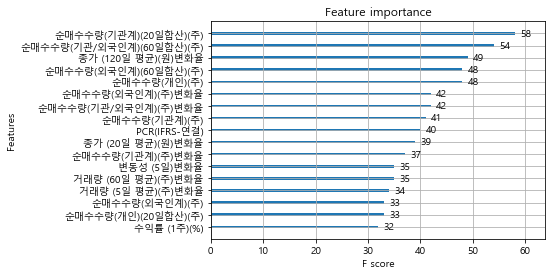

In [282]:
plot_importance(model)

In [ ]:
max_depth=[3,4,5,6,7,8,9,10,11,12,13,14], learning_rate=[0.05, 0.1, 0.3, 0.5] n_estimators=[300,500,1000], gamma=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5],
min_child_weight=1, max_delta_step=0,subsample=[0.5,0.75,1],
colsample_bytree=[0.6,0.7,0.8,0.9,1] colsample_bylevel=[0.6,0.7,0.8,0.9,1], reg_alpha=[0.01,0.1,0,1,10,100], reg_lambda=[0.01,0.1,1,10,100]

In [ ]:
ex_param_grid = {"max_depth": [3,4,5,6,7,8,9,10,11,12,13,14],
                 "learning_rate": [0.05, 0.1, 0.3, 0.5],
                 "n_estimators": [300,500,1000],
                 "gamma" :[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5],
                 "subsample": [0.5,0.75,1],
                 'min_child_weight':[0.5,1,2,3],
                 'max_delta_step':[0,1,2,3,4,5],
                 'colsample_bytree':[0.6,0.7,0.8,0.9,1],
                 'colsample_bylevel':[0.6,0.7,0.8,0.9,1],
                 'reg_alpha':[0.01,0.1,0,1,10,100],
                 'reg_lambda':[0.01,0.1,1,10,100]}

In [8]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [14]:
acc = []
pre = []
pram  []
for a in  [3,4,5,6,7,8,9,10,11,12,13,14]:
    for b in [0.05, 0.1, 0.3, 0.5]:
        for c in [300,500,1000]:
            for d in [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]:
                for e in [0.5,0.75,1]:
                    for f in [0.5,1,2,3]:
                        for g in [0,1,2,3,4,5]:
                            for h in [0.6,0.7,0.8,0.9,1]:
                                for i in [0.6,0.7,0.8,0.9,1]:
                                    for j in [0.01,0.1,0,1,10,100]:
                                        for k in [0.01,0.1,1,10,100]:
                                            model = XGBClassifier(max_depth= a, learning_rate=b ,n_estimators = c, gamma = d, subsample=e,
                                                                  min_child_weight=f, max_delta_step=g, colsample_bytree=h, colsample_bylevel=i, 
                                                                  reg_alpha=j, reg_lambda=k)
                                            model.fit(X_train[colsss] ,Y_train)
                                            a = model.predict(X_test[colsss])
                                            t = metrics.confusion_matrix(Y_test,a)

                                            acc.append(metrics.accuracy_score(a,Y_test))
                                            pre.append(t[1,1]/t[:,1].sum())
                                            param.append({"max_depth": a, "learning_rate": b, "n_estimators": c, "gamma" : d,
                                                         "subsample": e, 'min_child_weight':f, 'max_delta_step':g, 'colsample_bytree':h,
                                                         'colsample_bylevel':i, 'reg_alpha':j, 'reg_lambda':k})

max_depth:3 , gamma: 0,  min_child_weight:0  
 [[15 14]
 [ 4 27]] 
 pre 0.6585365853658537 
 acc 0.7 
 **************************************
max_depth:3 , gamma: 0,  min_child_weight:2  
 [[15 14]
 [ 3 28]] 
 pre 0.6666666666666666 
 acc 0.7166666666666667 
 **************************************
max_depth:3 , gamma: 0,  min_child_weight:4  
 [[15 14]
 [ 3 28]] 
 pre 0.6666666666666666 
 acc 0.7166666666666667 
 **************************************
max_depth:3 , gamma: 0,  min_child_weight:6  
 [[15 14]
 [ 3 28]] 
 pre 0.6666666666666666 
 acc 0.7166666666666667 
 **************************************
max_depth:3 , gamma: 0,  min_child_weight:8  
 [[15 14]
 [ 3 28]] 
 pre 0.6666666666666666 
 acc 0.7166666666666667 
 **************************************
max_depth:3 , gamma: 0,  min_child_weight:10  
 [[15 14]
 [ 3 28]] 
 pre 0.6666666666666666 
 acc 0.7166666666666667 
 **************************************
max_depth:3 , gamma: 0.5,  min_child_weight:0  
 [[14 15]
 [ 3 28]] 
 pr

max_depth:3 , gamma: 4.5,  min_child_weight:0  
 [[ 6 23]
 [ 0 31]] 
 pre 0.5740740740740741 
 acc 0.6166666666666667 
 **************************************
max_depth:3 , gamma: 4.5,  min_child_weight:2  
 [[ 6 23]
 [ 0 31]] 
 pre 0.5740740740740741 
 acc 0.6166666666666667 
 **************************************
max_depth:3 , gamma: 4.5,  min_child_weight:4  
 [[ 6 23]
 [ 0 31]] 
 pre 0.5740740740740741 
 acc 0.6166666666666667 
 **************************************
max_depth:3 , gamma: 4.5,  min_child_weight:6  
 [[ 6 23]
 [ 0 31]] 
 pre 0.5740740740740741 
 acc 0.6166666666666667 
 **************************************
max_depth:3 , gamma: 4.5,  min_child_weight:8  
 [[ 6 23]
 [ 0 31]] 
 pre 0.5740740740740741 
 acc 0.6166666666666667 
 **************************************
max_depth:3 , gamma: 4.5,  min_child_weight:10  
 [[ 6 23]
 [ 0 31]] 
 pre 0.5740740740740741 
 acc 0.6166666666666667 
 **************************************
max_depth:3 , gamma: 5,  min_child_weight:0  

max_depth:4 , gamma: 3.5,  min_child_weight:0  
 [[10 19]
 [ 1 30]] 
 pre 0.6122448979591837 
 acc 0.6666666666666666 
 **************************************
max_depth:4 , gamma: 3.5,  min_child_weight:2  
 [[10 19]
 [ 1 30]] 
 pre 0.6122448979591837 
 acc 0.6666666666666666 
 **************************************
max_depth:4 , gamma: 3.5,  min_child_weight:4  
 [[10 19]
 [ 1 30]] 
 pre 0.6122448979591837 
 acc 0.6666666666666666 
 **************************************
max_depth:4 , gamma: 3.5,  min_child_weight:6  
 [[10 19]
 [ 1 30]] 
 pre 0.6122448979591837 
 acc 0.6666666666666666 
 **************************************
max_depth:4 , gamma: 3.5,  min_child_weight:8  
 [[ 7 22]
 [ 1 30]] 
 pre 0.5769230769230769 
 acc 0.6166666666666667 
 **************************************
max_depth:4 , gamma: 3.5,  min_child_weight:10  
 [[10 19]
 [ 1 30]] 
 pre 0.6122448979591837 
 acc 0.6666666666666666 
 **************************************
max_depth:4 , gamma: 4,  min_child_weight:0  

max_depth:5 , gamma: 2.5,  min_child_weight:2  
 [[10 19]
 [ 3 28]] 
 pre 0.5957446808510638 
 acc 0.6333333333333333 
 **************************************
max_depth:5 , gamma: 2.5,  min_child_weight:4  
 [[12 17]
 [ 2 29]] 
 pre 0.6304347826086957 
 acc 0.6833333333333333 
 **************************************
max_depth:5 , gamma: 2.5,  min_child_weight:6  
 [[ 9 20]
 [ 3 28]] 
 pre 0.5833333333333334 
 acc 0.6166666666666667 
 **************************************
max_depth:5 , gamma: 2.5,  min_child_weight:8  
 [[12 17]
 [ 4 27]] 
 pre 0.6136363636363636 
 acc 0.65 
 **************************************
max_depth:5 , gamma: 2.5,  min_child_weight:10  
 [[11 18]
 [ 5 26]] 
 pre 0.5909090909090909 
 acc 0.6166666666666667 
 **************************************
max_depth:5 , gamma: 3,  min_child_weight:0  
 [[10 19]
 [ 4 27]] 
 pre 0.5869565217391305 
 acc 0.6166666666666667 
 **************************************
max_depth:5 , gamma: 3,  min_child_weight:2  
 [[10 19]
 [ 4 

max_depth:6 , gamma: 1.5,  min_child_weight:4  
 [[10 19]
 [ 5 26]] 
 pre 0.5777777777777777 
 acc 0.6 
 **************************************
max_depth:6 , gamma: 1.5,  min_child_weight:6  
 [[11 18]
 [ 3 28]] 
 pre 0.6086956521739131 
 acc 0.65 
 **************************************
max_depth:6 , gamma: 1.5,  min_child_weight:8  
 [[10 19]
 [ 2 29]] 
 pre 0.6041666666666666 
 acc 0.65 
 **************************************
max_depth:6 , gamma: 1.5,  min_child_weight:10  
 [[14 15]
 [ 5 26]] 
 pre 0.6341463414634146 
 acc 0.6666666666666666 
 **************************************
max_depth:6 , gamma: 2,  min_child_weight:0  
 [[10 19]
 [ 4 27]] 
 pre 0.5869565217391305 
 acc 0.6166666666666667 
 **************************************
max_depth:6 , gamma: 2,  min_child_weight:2  
 [[11 18]
 [ 5 26]] 
 pre 0.5909090909090909 
 acc 0.6166666666666667 
 **************************************
max_depth:6 , gamma: 2,  min_child_weight:4  
 [[ 8 21]
 [ 4 27]] 
 pre 0.5625 
 acc 0.58333

max_depth:7 , gamma: 0.5,  min_child_weight:6  
 [[12 17]
 [ 5 26]] 
 pre 0.6046511627906976 
 acc 0.6333333333333333 
 **************************************
max_depth:7 , gamma: 0.5,  min_child_weight:8  
 [[12 17]
 [ 4 27]] 
 pre 0.6136363636363636 
 acc 0.65 
 **************************************
max_depth:7 , gamma: 0.5,  min_child_weight:10  
 [[13 16]
 [ 3 28]] 
 pre 0.6363636363636364 
 acc 0.6833333333333333 
 **************************************
max_depth:7 , gamma: 1,  min_child_weight:0  
 [[12 17]
 [ 5 26]] 
 pre 0.6046511627906976 
 acc 0.6333333333333333 
 **************************************
max_depth:7 , gamma: 1,  min_child_weight:2  
 [[14 15]
 [ 4 27]] 
 pre 0.6428571428571429 
 acc 0.6833333333333333 
 **************************************
max_depth:7 , gamma: 1,  min_child_weight:4  
 [[12 17]
 [ 5 26]] 
 pre 0.6046511627906976 
 acc 0.6333333333333333 
 **************************************
max_depth:7 , gamma: 1,  min_child_weight:6  
 [[11 18]
 [ 4 27]]

max_depth:7 , gamma: 5,  min_child_weight:8  
 [[ 6 23]
 [ 0 31]] 
 pre 0.5740740740740741 
 acc 0.6166666666666667 
 **************************************
max_depth:7 , gamma: 5,  min_child_weight:10  
 [[ 6 23]
 [ 0 31]] 
 pre 0.5740740740740741 
 acc 0.6166666666666667 
 **************************************
max_depth:8 , gamma: 0,  min_child_weight:0  
 [[12 17]
 [ 5 26]] 
 pre 0.6046511627906976 
 acc 0.6333333333333333 
 **************************************
max_depth:8 , gamma: 0,  min_child_weight:2  
 [[13 16]
 [ 6 25]] 
 pre 0.6097560975609756 
 acc 0.6333333333333333 
 **************************************
max_depth:8 , gamma: 0,  min_child_weight:4  
 [[11 18]
 [ 5 26]] 
 pre 0.5909090909090909 
 acc 0.6166666666666667 
 **************************************
max_depth:8 , gamma: 0,  min_child_weight:6  
 [[10 19]
 [ 4 27]] 
 pre 0.5869565217391305 
 acc 0.6166666666666667 
 **************************************
max_depth:8 , gamma: 0,  min_child_weight:8  
 [[10 19]
 

max_depth:8 , gamma: 4,  min_child_weight:10  
 [[ 8 21]
 [ 1 30]] 
 pre 0.5882352941176471 
 acc 0.6333333333333333 
 **************************************
max_depth:8 , gamma: 4.5,  min_child_weight:0  
 [[ 5 24]
 [ 2 29]] 
 pre 0.5471698113207547 
 acc 0.5666666666666667 
 **************************************
max_depth:8 , gamma: 4.5,  min_child_weight:2  
 [[ 5 24]
 [ 2 29]] 
 pre 0.5471698113207547 
 acc 0.5666666666666667 
 **************************************
max_depth:8 , gamma: 4.5,  min_child_weight:4  
 [[ 6 23]
 [ 1 30]] 
 pre 0.5660377358490566 
 acc 0.6 
 **************************************
max_depth:8 , gamma: 4.5,  min_child_weight:6  
 [[ 6 23]
 [ 1 30]] 
 pre 0.5660377358490566 
 acc 0.6 
 **************************************
max_depth:8 , gamma: 4.5,  min_child_weight:8  
 [[ 6 23]
 [ 1 30]] 
 pre 0.5660377358490566 
 acc 0.6 
 **************************************
max_depth:8 , gamma: 4.5,  min_child_weight:10  
 [[ 6 23]
 [ 1 30]] 
 pre 0.566037735849056

max_depth:9 , gamma: 3.5,  min_child_weight:0  
 [[ 8 21]
 [ 3 28]] 
 pre 0.5714285714285714 
 acc 0.6 
 **************************************
max_depth:9 , gamma: 3.5,  min_child_weight:2  
 [[ 8 21]
 [ 2 29]] 
 pre 0.58 
 acc 0.6166666666666667 
 **************************************
max_depth:9 , gamma: 3.5,  min_child_weight:4  
 [[ 8 21]
 [ 2 29]] 
 pre 0.58 
 acc 0.6166666666666667 
 **************************************
max_depth:9 , gamma: 3.5,  min_child_weight:6  
 [[ 8 21]
 [ 2 29]] 
 pre 0.58 
 acc 0.6166666666666667 
 **************************************
max_depth:9 , gamma: 3.5,  min_child_weight:8  
 [[ 7 22]
 [ 1 30]] 
 pre 0.5769230769230769 
 acc 0.6166666666666667 
 **************************************
max_depth:9 , gamma: 3.5,  min_child_weight:10  
 [[ 7 22]
 [ 1 30]] 
 pre 0.5769230769230769 
 acc 0.6166666666666667 
 **************************************
max_depth:9 , gamma: 4,  min_child_weight:0  
 [[ 9 20]
 [ 2 29]] 
 pre 0.5918367346938775 
 acc 0.633

max_depth:10 , gamma: 2.5,  min_child_weight:2  
 [[ 9 20]
 [ 2 29]] 
 pre 0.5918367346938775 
 acc 0.6333333333333333 
 **************************************
max_depth:10 , gamma: 2.5,  min_child_weight:4  
 [[12 17]
 [ 2 29]] 
 pre 0.6304347826086957 
 acc 0.6833333333333333 
 **************************************
max_depth:10 , gamma: 2.5,  min_child_weight:6  
 [[11 18]
 [ 2 29]] 
 pre 0.6170212765957447 
 acc 0.6666666666666666 
 **************************************
max_depth:10 , gamma: 2.5,  min_child_weight:8  
 [[12 17]
 [ 4 27]] 
 pre 0.6136363636363636 
 acc 0.65 
 **************************************
max_depth:10 , gamma: 2.5,  min_child_weight:10  
 [[11 18]
 [ 5 26]] 
 pre 0.5909090909090909 
 acc 0.6166666666666667 
 **************************************
max_depth:10 , gamma: 3,  min_child_weight:0  
 [[ 8 21]
 [ 2 29]] 
 pre 0.58 
 acc 0.6166666666666667 
 **************************************
max_depth:10 , gamma: 3,  min_child_weight:2  
 [[11 18]
 [ 2 29]] 
 

max_depth:11 , gamma: 1.5,  min_child_weight:4  
 [[11 18]
 [ 4 27]] 
 pre 0.6 
 acc 0.6333333333333333 
 **************************************
max_depth:11 , gamma: 1.5,  min_child_weight:6  
 [[11 18]
 [ 3 28]] 
 pre 0.6086956521739131 
 acc 0.65 
 **************************************
max_depth:11 , gamma: 1.5,  min_child_weight:8  
 [[10 19]
 [ 2 29]] 
 pre 0.6041666666666666 
 acc 0.65 
 **************************************
max_depth:11 , gamma: 1.5,  min_child_weight:10  
 [[14 15]
 [ 5 26]] 
 pre 0.6341463414634146 
 acc 0.6666666666666666 
 **************************************
max_depth:11 , gamma: 2,  min_child_weight:0  
 [[13 16]
 [ 4 27]] 
 pre 0.627906976744186 
 acc 0.6666666666666666 
 **************************************
max_depth:11 , gamma: 2,  min_child_weight:2  
 [[11 18]
 [ 3 28]] 
 pre 0.6086956521739131 
 acc 0.65 
 **************************************
max_depth:11 , gamma: 2,  min_child_weight:4  
 [[11 18]
 [ 3 28]] 
 pre 0.6086956521739131 
 acc 0.6

max_depth:12 , gamma: 0.5,  min_child_weight:6  
 [[13 16]
 [ 7 24]] 
 pre 0.6 
 acc 0.6166666666666667 
 **************************************
max_depth:12 , gamma: 0.5,  min_child_weight:8  
 [[12 17]
 [ 4 27]] 
 pre 0.6136363636363636 
 acc 0.65 
 **************************************
max_depth:12 , gamma: 0.5,  min_child_weight:10  
 [[13 16]
 [ 3 28]] 
 pre 0.6363636363636364 
 acc 0.6833333333333333 
 **************************************
max_depth:12 , gamma: 1,  min_child_weight:0  
 [[10 19]
 [ 6 25]] 
 pre 0.5681818181818182 
 acc 0.5833333333333334 
 **************************************
max_depth:12 , gamma: 1,  min_child_weight:2  
 [[13 16]
 [ 3 28]] 
 pre 0.6363636363636364 
 acc 0.6833333333333333 
 **************************************
max_depth:12 , gamma: 1,  min_child_weight:4  
 [[11 18]
 [ 6 25]] 
 pre 0.5813953488372093 
 acc 0.6 
 **************************************
max_depth:12 , gamma: 1,  min_child_weight:6  
 [[13 16]
 [ 4 27]] 
 pre 0.62790697674418

max_depth:12 , gamma: 5,  min_child_weight:8  
 [[ 6 23]
 [ 0 31]] 
 pre 0.5740740740740741 
 acc 0.6166666666666667 
 **************************************
max_depth:12 , gamma: 5,  min_child_weight:10  
 [[ 6 23]
 [ 0 31]] 
 pre 0.5740740740740741 
 acc 0.6166666666666667 
 **************************************
max_depth:13 , gamma: 0,  min_child_weight:0  
 [[11 18]
 [ 4 27]] 
 pre 0.6 
 acc 0.6333333333333333 
 **************************************
max_depth:13 , gamma: 0,  min_child_weight:2  
 [[11 18]
 [ 5 26]] 
 pre 0.5909090909090909 
 acc 0.6166666666666667 
 **************************************
max_depth:13 , gamma: 0,  min_child_weight:4  
 [[13 16]
 [ 7 24]] 
 pre 0.6 
 acc 0.6166666666666667 
 **************************************
max_depth:13 , gamma: 0,  min_child_weight:6  
 [[10 19]
 [ 4 27]] 
 pre 0.5869565217391305 
 acc 0.6166666666666667 
 **************************************
max_depth:13 , gamma: 0,  min_child_weight:8  
 [[10 19]
 [ 5 26]] 
 pre 0.577777

max_depth:13 , gamma: 4,  min_child_weight:10  
 [[ 8 21]
 [ 1 30]] 
 pre 0.5882352941176471 
 acc 0.6333333333333333 
 **************************************
max_depth:13 , gamma: 4.5,  min_child_weight:0  
 [[ 5 24]
 [ 2 29]] 
 pre 0.5471698113207547 
 acc 0.5666666666666667 
 **************************************
max_depth:13 , gamma: 4.5,  min_child_weight:2  
 [[ 5 24]
 [ 2 29]] 
 pre 0.5471698113207547 
 acc 0.5666666666666667 
 **************************************
max_depth:13 , gamma: 4.5,  min_child_weight:4  
 [[ 6 23]
 [ 1 30]] 
 pre 0.5660377358490566 
 acc 0.6 
 **************************************
max_depth:13 , gamma: 4.5,  min_child_weight:6  
 [[ 6 23]
 [ 1 30]] 
 pre 0.5660377358490566 
 acc 0.6 
 **************************************
max_depth:13 , gamma: 4.5,  min_child_weight:8  
 [[ 6 23]
 [ 1 30]] 
 pre 0.5660377358490566 
 acc 0.6 
 **************************************
max_depth:13 , gamma: 4.5,  min_child_weight:10  
 [[ 6 23]
 [ 1 30]] 
 pre 0.56603773

max_depth:14 , gamma: 3,  min_child_weight:10  
 [[13 16]
 [ 5 26]] 
 pre 0.6190476190476191 
 acc 0.65 
 **************************************
max_depth:14 , gamma: 3.5,  min_child_weight:0  
 [[ 8 21]
 [ 3 28]] 
 pre 0.5714285714285714 
 acc 0.6 
 **************************************
max_depth:14 , gamma: 3.5,  min_child_weight:2  
 [[ 8 21]
 [ 2 29]] 
 pre 0.58 
 acc 0.6166666666666667 
 **************************************
max_depth:14 , gamma: 3.5,  min_child_weight:4  
 [[ 8 21]
 [ 2 29]] 
 pre 0.58 
 acc 0.6166666666666667 
 **************************************
max_depth:14 , gamma: 3.5,  min_child_weight:6  
 [[ 8 21]
 [ 2 29]] 
 pre 0.58 
 acc 0.6166666666666667 
 **************************************
max_depth:14 , gamma: 3.5,  min_child_weight:8  
 [[ 7 22]
 [ 1 30]] 
 pre 0.5769230769230769 
 acc 0.6166666666666667 
 **************************************
max_depth:14 , gamma: 3.5,  min_child_weight:10  
 [[ 7 22]
 [ 1 30]] 
 pre 0.5769230769230769 
 acc 0.616666666

In [12]:
max(acc)

0.5833333333333334

## Back testing

In [17]:
backtestdata = pd.read_excel('./Final_testdataset.xlsx')

In [18]:
backtestdata

,순매수수량(외국인계)(20일합산)(주),외국인보유비중(티커)(%),외국인보유비중(티커)(%)변화율,변동성 (5일),순매수수량(외국인계)(60일합산)(주),PCR(IFRS-연결)변화율,PBR(IFRS-연결),순매수수량(기관/외국인계)(주),PER(IFRS-연결)변화율,거래량 (5일 평균)(주),...,PBR(IFRS-연결)변화율,순매수수량(기관/외국인계)(주)변화율,순매수수량(기관/외국인계)(20일합산)(주),종가 (60일 평균)(원),순매수수량(개인)(20일합산)(주)변화율,수익률 (1주)(%)변화율,순매수수량(개인)(주)변화율,순매수수량(기관계)(주),Name,수익률(%)(2)
2018-12-28,1,0,1,1,0,1,0,0,1,1,...,1,1,0,0,0,1,0,0,코웨이,1
2019-01-02,1,1,1,0,1,1,1,1,1,0,...,1,0,0,0,1,1,1,0,코웨이,1
2019-01-03,1,1,1,0,1,1,1,1,1,0,...,1,1,1,0,0,1,0,1,코웨이,1
2019-01-04,1,1,1,1,1,1,1,1,1,0,...,1,1,1,0,0,1,0,1,코웨이,0
2019-01-07,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,코웨이,1
2019-01-09,1,1,1,1,1,1,0,1,1,0,...,1,1,0,0,0,1,0,0,코웨이,0
2019-01-10,1,1,0,1,1,0,1,1,0,0,...,0,0,0,0,1,0,1,1,코웨이,1
2019-01-11,1,0,1,0,1,1,1,1,1,1,...,1,1,0,0,0,0,0,1,코웨이,1
2019-01-14,1,0,0,0,1,0,1,1,0,1,...,0,0,1,0,1,1,1,1,코웨이,0
2019-01-15,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,1,코웨이,0


In [52]:
colsss = ['PCR(IFRS-연결)',
 '거래량 (5일 평균)(주)변화율',
 '거래량 (60일 평균)(주)변화율',
 '변동성 (5일)변화율',
 '수익률 (1주)(%)',
 '순매수수량(개인)(20일합산)(주)',
 '순매수수량(개인)(주)',
 '순매수수량(기관/외국인계)(60일합산)(주)',
 '순매수수량(기관/외국인계)(주)변화율',
 '순매수수량(기관계)(20일합산)(주)',
 '순매수수량(기관계)(주)',
 '순매수수량(기관계)(주)변화율',
 '순매수수량(외국인계)(60일합산)(주)',
 '순매수수량(외국인계)(주)',
 '순매수수량(외국인계)(주)변화율',
 '종가 (120일 평균)(원)변화율',
 '종가 (20일 평균)(원)변화율']

X_train = train[colsss]
X_test = backtestdata[colsss]

Y_train = train['수익률(%)(2)']
Y_test = backtestdata['수익률(%)(2)']

model = XGBClassifier(colsample_bytree=0.8, gamm=0, learning_rate = 0.1, max_depth = 4, min_child_weight=0.5,
                      reg_alpha=0.1, reg_lambda=1, subsample = 0.5)
model.fit(X_train[colsss] ,Y_train)
a = model.predict(X_train[colsss])
b = model.predict(X_test[colsss])
t = metrics.confusion_matrix(Y_test,b)
print('val: {x:.5}, acc: {y:.5}, pre:{g:.5}'.format(x = metrics.accuracy_score(a,Y_train),y = metrics.accuracy_score(b,Y_test),g = t[1,1]/t[:,1].sum() ))

val: 0.74709, acc: 0.63158, pre:0.77778


In [32]:
t

array([[4, 3],
       [5, 7]], dtype=int64)

In [53]:
# 0.8	0	0.1	4	0.5	0	10	0.5
# 0.8	0	0.1	4	0.5	0.1	1	0.5

b

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0],
      dtype=int64)

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0]

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0]

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0]



In [45]:
Y_test

2018-12-28    1
2019-01-02    1
2019-01-03    1
2019-01-04    0
2019-01-07    1
2019-01-09    0
2019-01-10    1
2019-01-11    1
2019-01-14    0
2019-01-15    0
2019-01-16    1
2019-01-18    1
2019-01-21    0
2019-01-22    1
2019-01-23    0
2019-01-24    0
2019-01-25    1
2019-01-28    1
2019-01-29    1
Name: 수익률(%)(2), dtype: int64

In [46]:
X_train

,PCR(IFRS-연결),거래량 (5일 평균)(주)변화율,거래량 (60일 평균)(주)변화율,변동성 (5일)변화율,수익률 (1주)(%),순매수수량(개인)(20일합산)(주),순매수수량(개인)(주),순매수수량(기관/외국인계)(60일합산)(주),순매수수량(기관/외국인계)(주)변화율,순매수수량(기관계)(20일합산)(주),순매수수량(기관계)(주),순매수수량(기관계)(주)변화율,순매수수량(외국인계)(60일합산)(주),순매수수량(외국인계)(주),순매수수량(외국인계)(주)변화율,종가 (120일 평균)(원)변화율,종가 (20일 평균)(원)변화율
2013-06-07,1,0,0,0,1,1,1,1,0,0,1,1,1,0,0,1,1
2013-06-10,0,0,0,1,0,1,1,1,0,1,1,0,0,0,0,1,1
2013-06-11,0,1,0,0,0,1,1,0,1,0,0,0,1,1,1,1,1
2013-06-12,0,0,0,0,0,1,0,1,0,0,0,1,1,1,0,1,0
2013-06-13,0,0,1,0,0,1,0,0,1,1,1,1,0,0,0,1,0
2013-06-14,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0
2013-06-17,1,1,0,0,1,0,1,0,1,1,0,0,0,1,1,1,0
2013-06-18,0,1,0,0,1,1,1,0,0,1,0,0,0,1,0,1,0
2013-06-19,1,1,0,0,1,1,0,0,1,1,0,0,0,1,1,1,0
2013-06-20,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,1,0
